In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eeg-dataset/aaaaaanr_s001_t001.edf


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf

print("Number of GPU's available", len(tf.config.list_physical_devices('GPU')))
print("GPU:", tf.config.list_physical_devices('GPU'))

2025-10-27 14:31:48.969202: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761575509.356621      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761575509.468877      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Number of GPU's available 2
GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [4]:
pip install mne

Note: you may need to restart the kernel to use updated packages.


In [5]:
import torch


In [6]:
torch.cuda.is_available()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [7]:
import mne

file = '/kaggle/input/eeg-dataset/aaaaaanr_s001_t001.edf' 

raw = mne.io.read_raw_edf(file, preload=True)

print(raw.info)

Extracting EDF parameters from /kaggle/input/eeg-dataset/aaaaaanr_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 303499  =      0.000 ...  1213.996 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: EEG FP1-LE, EEG FP2-LE, EEG F3-LE, EEG F4-LE, EEG C3-LE, EEG ...
 chs: 33 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2003-01-01 00:00:00 UTC
 nchan: 33
 projs: []
 sfreq: 250.0 Hz
 subject_info: <subject_info | his_id: aaaaaanr, sex: 1, last_name: aaaaaanr>
>


In [8]:
raw.ch_names

['EEG FP1-LE',
 'EEG FP2-LE',
 'EEG F3-LE',
 'EEG F4-LE',
 'EEG C3-LE',
 'EEG C4-LE',
 'EEG A1-LE',
 'EEG A2-LE',
 'EEG P3-LE',
 'EEG P4-LE',
 'EEG O1-LE',
 'EEG O2-LE',
 'EEG F7-LE',
 'EEG F8-LE',
 'EEG T3-LE',
 'EEG T4-LE',
 'EEG T5-LE',
 'EEG T6-LE',
 'EEG FZ-LE',
 'EEG CZ-LE',
 'EEG PZ-LE',
 'EEG OZ-LE',
 'EEG PG1-LE',
 'EEG PG2-LE',
 'EEG EKG-LE',
 'EEG SP2-LE',
 'EEG SP1-LE',
 'EEG 28-LE',
 'EEG 29-LE',
 'EEG 30-LE',
 'EEG T1-LE',
 'EEG T2-LE',
 'PHOTIC PH']

In [9]:
channels = ['FP1','FP2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','T5','T6','FZ','PZ']
print(len(channels))

16


In [10]:
picked_channels = [ch for ch in raw.info['ch_names'] if any(w in ch for w in channels)]

In [11]:
raw.pick(picked_channels)

<RawEDF | aaaaaanr_s001_t001.edf, 16 x 303500 (1214.0 s), ~37.1 MiB, data loaded>

In [12]:
print(raw.info['ch_names'])

['EEG FP1-LE', 'EEG FP2-LE', 'EEG F3-LE', 'EEG F4-LE', 'EEG C3-LE', 'EEG C4-LE', 'EEG P3-LE', 'EEG P4-LE', 'EEG O1-LE', 'EEG O2-LE', 'EEG F7-LE', 'EEG F8-LE', 'EEG T5-LE', 'EEG T6-LE', 'EEG FZ-LE', 'EEG PZ-LE']


Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


/tmp/ipykernel_36/4108630121.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd().plot()


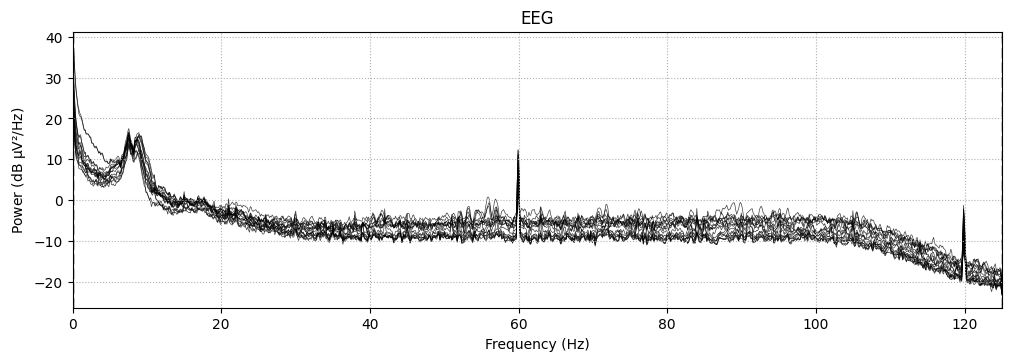

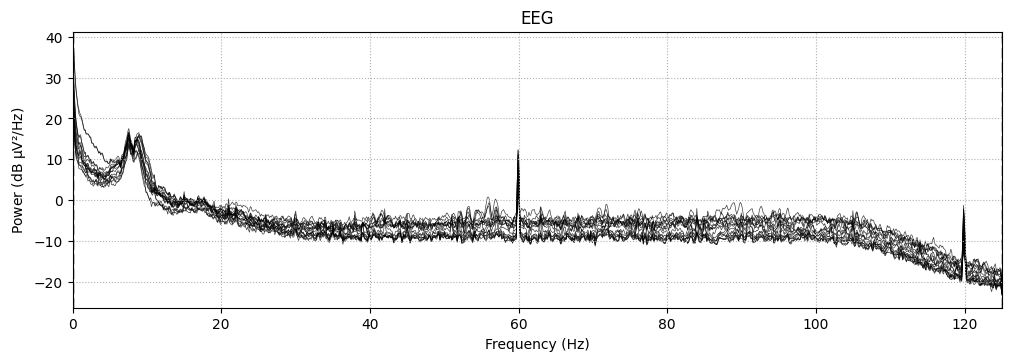

In [13]:
raw.compute_psd().plot()

In [14]:
low_cut = 0.1
high_cut = 30

raw_filter = raw.copy().filter(low_cut, high_cut)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 8251 samples (33.004 s)



[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.2s finished


Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


/tmp/ipykernel_36/3507797121.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_filter.compute_psd().plot()


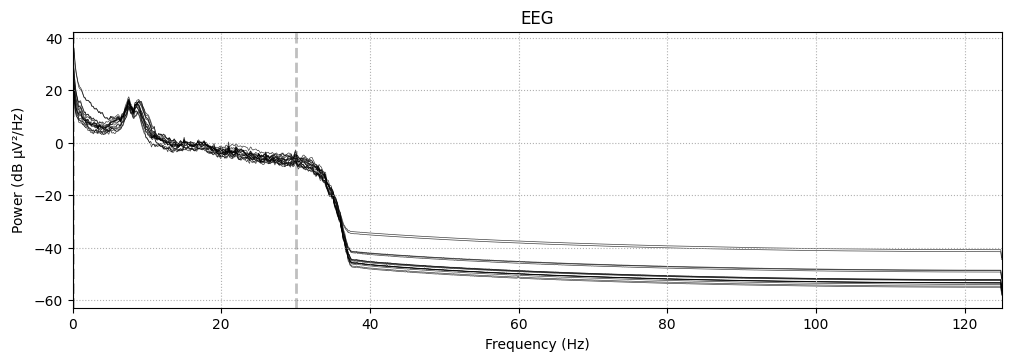

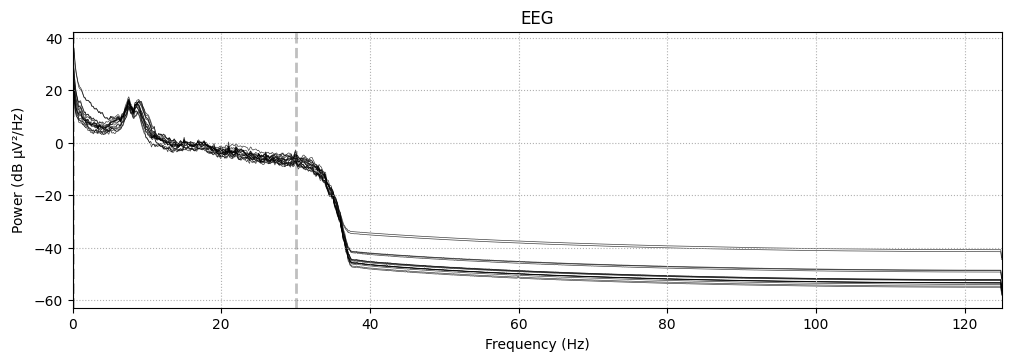

In [15]:
raw_filter.compute_psd().plot()

Using matplotlib as 2D backend.


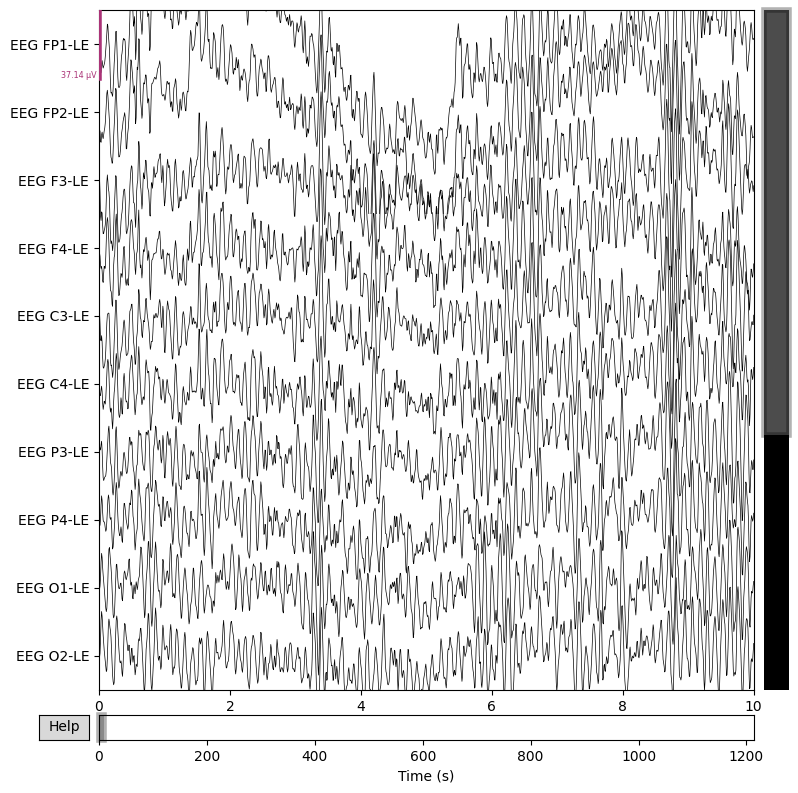

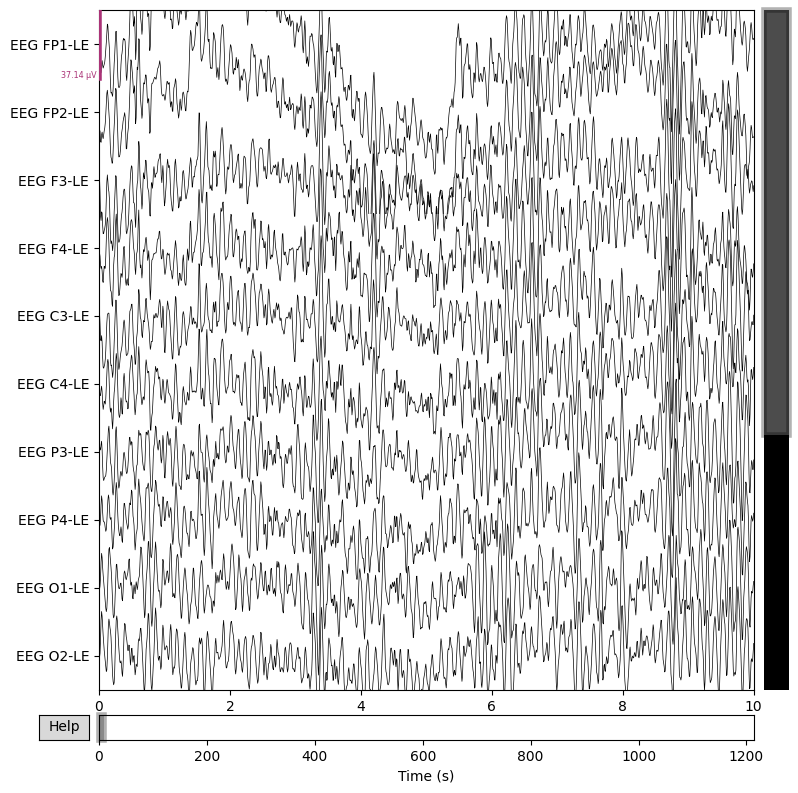

In [16]:
raw_filter.plot(duration=10, n_channels=10, scalings='auto')

In [17]:
print("Time in S", raw.times[-1])

Time in S 1213.996


In [18]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


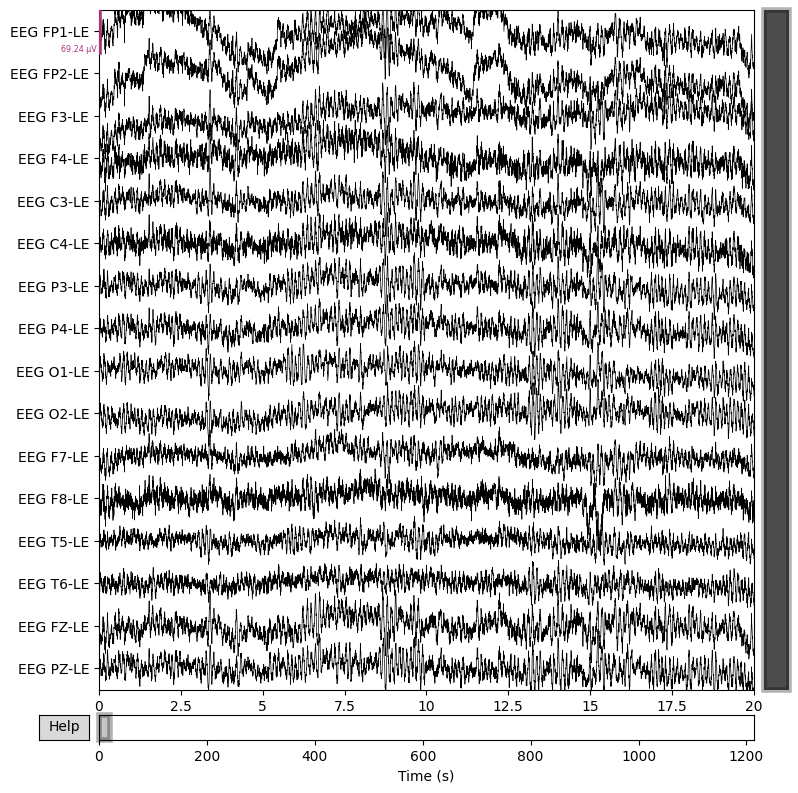

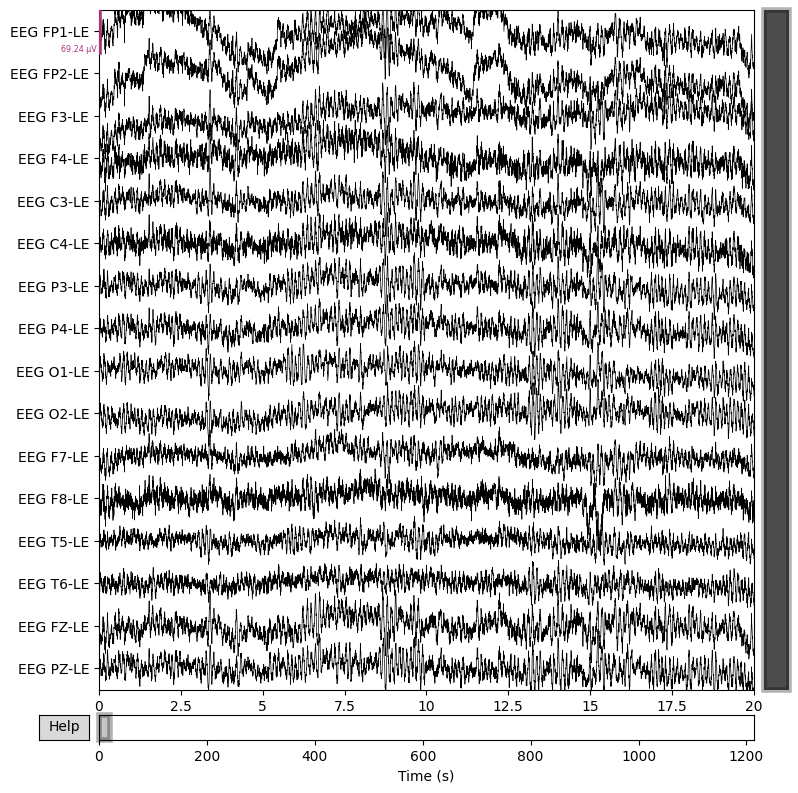

In [19]:
import matplotlib.pyplot as plt

raw.plot(n_channels=16, duration=20, scalings = 'auto', title = 'EEG Signals')

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


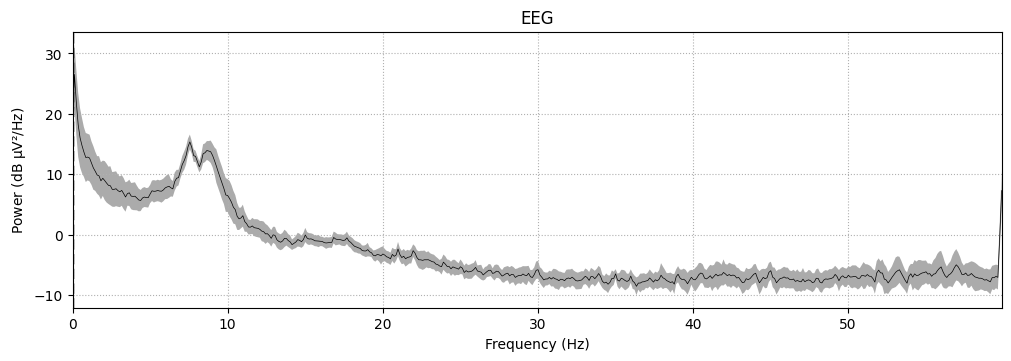

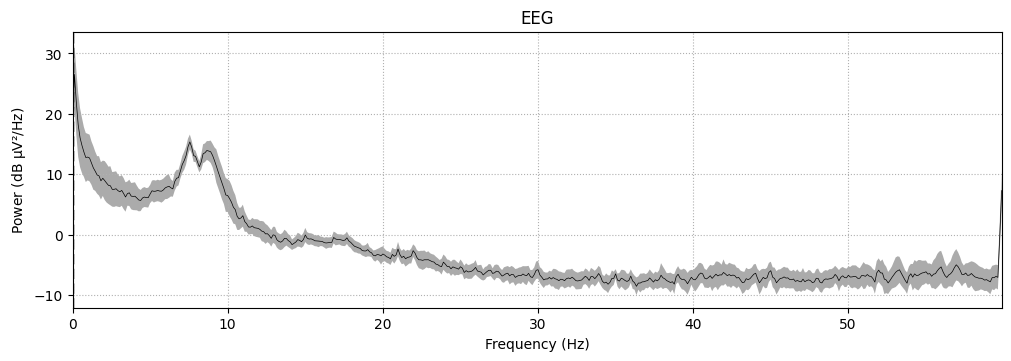

In [20]:
raw.plot_psd(fmax=60, average=True, show=True)

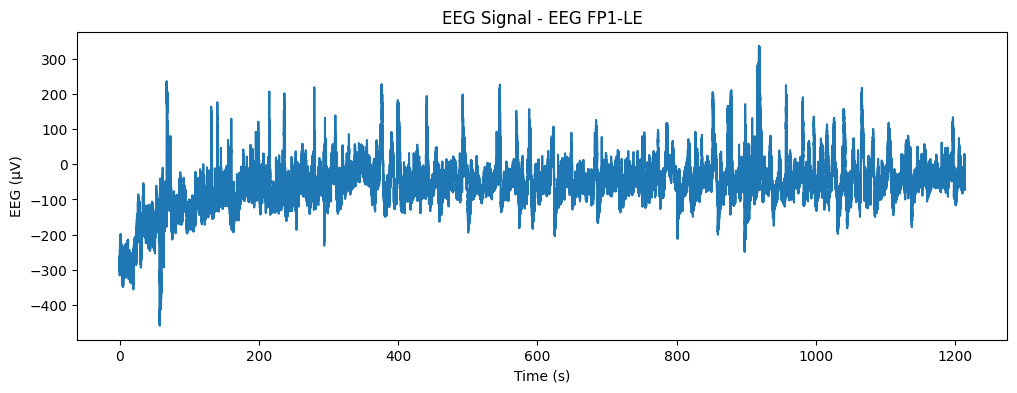

In [21]:
data, times = raw[0,:]

plt.figure(figsize=(12, 4))
plt.plot(times, data[0] * 1e6)  # convert Volts → microVolts
plt.xlabel("Time (s)")
plt.ylabel("EEG (µV)")
plt.title(f"EEG Signal - {raw.ch_names[0]}")
plt.show()

In [22]:
channel_names = raw.info['ch_names']
print(channel_names)

['EEG FP1-LE', 'EEG FP2-LE', 'EEG F3-LE', 'EEG F4-LE', 'EEG C3-LE', 'EEG C4-LE', 'EEG P3-LE', 'EEG P4-LE', 'EEG O1-LE', 'EEG O2-LE', 'EEG F7-LE', 'EEG F8-LE', 'EEG T5-LE', 'EEG T6-LE', 'EEG FZ-LE', 'EEG PZ-LE']


In [24]:
# Set a standard montage (10-20 system works for most clinical EEG)
# montage = mne.channels.make_standard_montage("standard_1020")
# raw.set_montage(montage)

# # Now you can plot sensors
# raw.plot_sensors(show_names=True)

In [25]:
# Example renaming (strip "EEG " and "-LE")
mapping = {ch: ch.replace("EEG ", "").replace("-LE", "") for ch in raw.ch_names}
raw.rename_channels(mapping)


<RawEDF | aaaaaanr_s001_t001.edf, 16 x 303500 (1214.0 s), ~37.1 MiB, data loaded>